In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys

sys.path.append('../utils/')

%load_ext autoreload
%autoreload 2


from iterative_BOT_solver import iterative_bot_solver
from tree_growing_heuristic import tree_growing_heuristic
from geometric_construction_solver import geometric_bot_solver
from com_heuristic import left_child_halfplane_decider

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


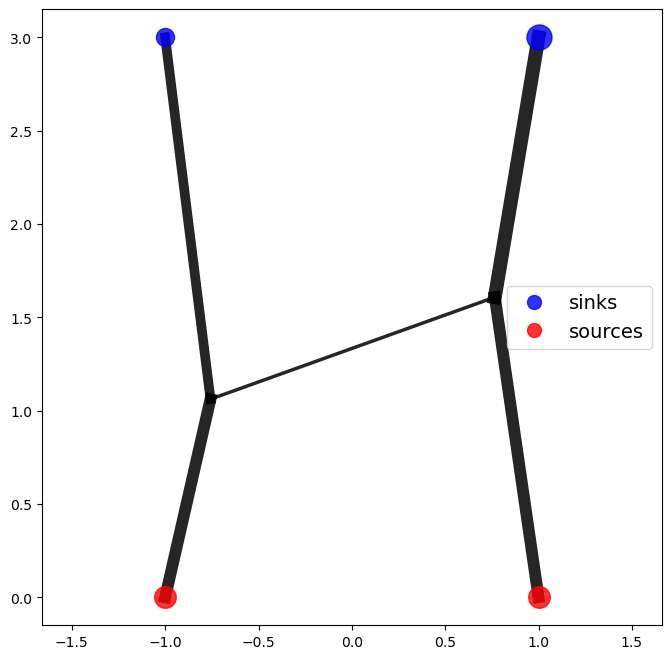

In [3]:
#next example 2 -> 2 branching:
#input:
children_dict = {
    -2:[3],
    1:[-2],
    -1:[2,-2],
    0:[-1]
}

list_source_idx = [0,1]
list_sink_idx = [2,3]

supply_arr = np.array([0.5,0.5])
demand_arr = np.array([0.4, 0.6])

#positions:
coords_sources = np.array([
    [-1.,0.],
    [1,0.]
])

coords_sinks = np.array([
    [-1.,3.],
    [1.,3.]  
])

#alpha parameter:
al = 0.65
cost, coords_iter = iterative_bot_solver(children_dict, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                    relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                    plot=True, title="", fov=None, save=False, save_name="img")

topo = nx.Graph()
for parent in children_dict:
    for child in children_dict[parent]:
        topo.add_edge(parent, child)

iter_left_child_dict = left_child_halfplane_decider(topo, coords_iter)

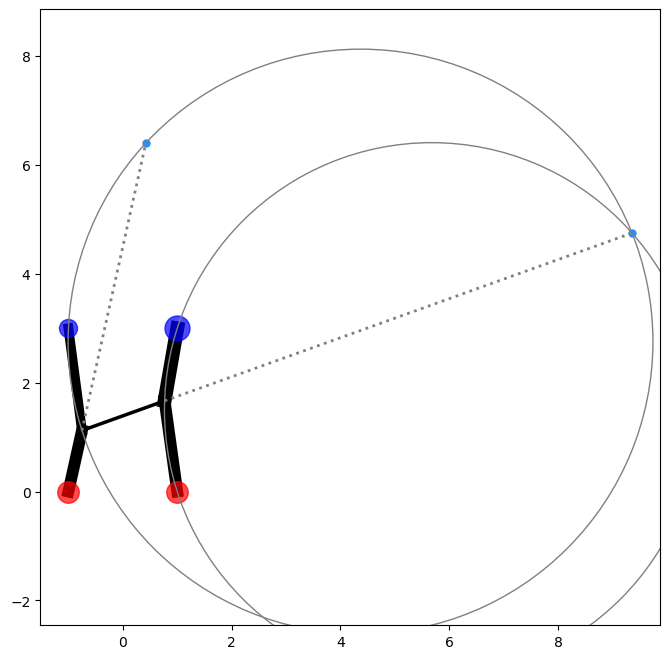

({-1: <geometric_construction_solver.branching_point_class at 0x7eff493f09d0>,
  -2: <geometric_construction_solver.branching_point_class at 0x7eff493f0df0>},
 4.181333829085444)

In [4]:
geometric_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                iter_left_child_dict,
                plot=True, title="", fov=None, save=True, save_name="img")

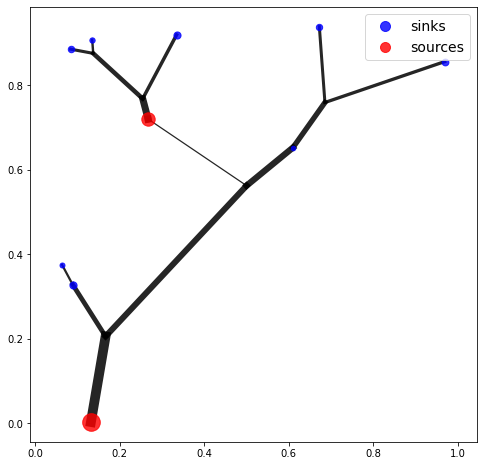

An L branching did occur and the geometric construction is not optimal.


In [33]:
import pickle

size = 10

pkl_file_path = f"experiments_to_run/results/heuristic_comparison_size{size}_full.pkl"
pkl_file = open(pkl_file_path, 'rb')
results_dict = pickle.load(pkl_file)
pkl_file.close()

key = 3
thread_dict = results_dict[8]
bot_problem_dict = thread_dict[key]["bot_problem_dict"]
topo = thread_dict[key]["stress_topo_MC"]

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]


cost, coords_iter = iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                    relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                    plot=True, title="", fov=None, save=False, save_name="img")

iter_left_child_dict = left_child_halfplane_decider(topo, coords_iter)
geometric_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                iter_left_child_dict,
                plot=True, title="", fov=None, save=False, save_name="img")

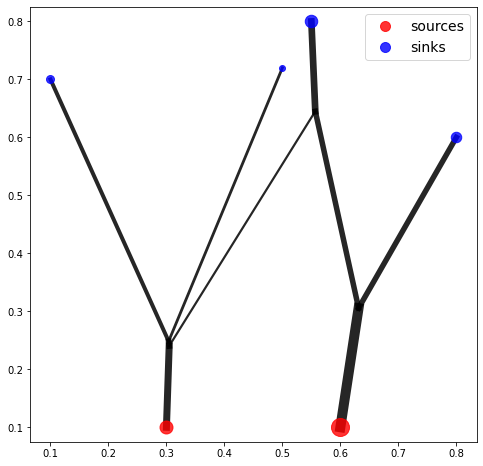

In [7]:
#test with two connected components:
list_source_idx = [0,1]
list_sink_idx = [2,3,4,5]

children_dict = {
    0:[-1],
    -1:[-2,-3],
    -3:[3,2],
    -2:[4,-4],
    -4:[1,5]
}


supply_arr = np.array([2. ,3.]) 
demand_arr = np.array([1.,0.6,1.9,1.5 ]) 

#positions:
coords_sources = np.array([
    [0.3,0.1],
    [0.6,0.1]
])

coords_sinks = np.array([
    [0.1,0.7],
    [0.5,0.72],
    [0.55,0.8],
    [0.8,0.6]
])

al = 0.9
cost, coords_iter = iterative_bot_solver(children_dict, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                    relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=600,
                                    plot=True, title="", fov=None, save=False, save_name="img")

({-1: <geometric_solver.branching_point_class at 0x7ff40847e2b0>,
  -2: <geometric_solver.branching_point_class at 0x7ff40847e340>,
  -3: <geometric_solver.branching_point_class at 0x7ff40847e370>,
  -4: <geometric_solver.branching_point_class at 0x7ff40847e3a0>},
 16.494767225203205)

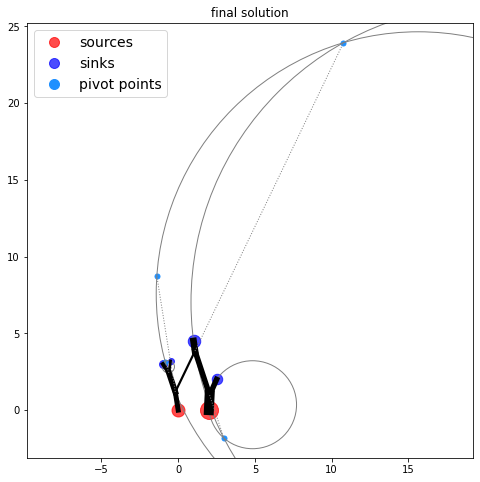

In [5]:
topo = nx.Graph()
for parent in children_dict:
    for child in children_dict[parent]:
        topo.add_edge(parent, child)
        
iter_left_child_dict = left_child_halfplane_decider(topo, coords_iter)

geometric_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                iter_left_child_dict,
                plot=True, title="", fov=fov, save=False, save_name="img")

AssertionError: mistake in labelling convention! ([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5], [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3])


seed= 7


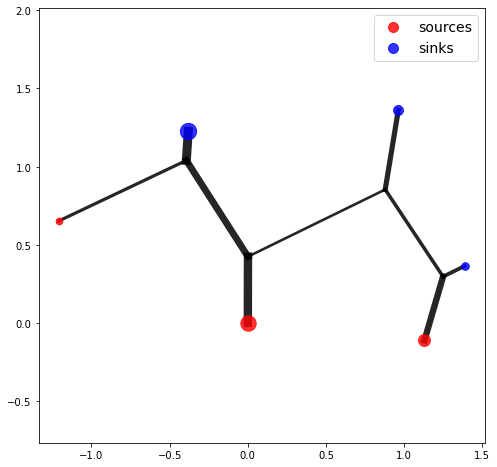

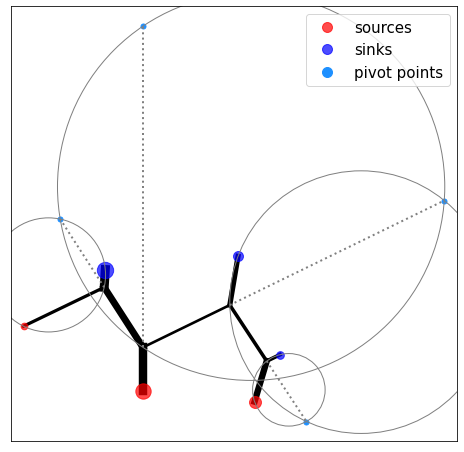

In [6]:
for seed in [7]:
    print("\nseed=", seed)
    
    np.random.seed(seed)
    
    # WLOG, use convention that we always want more sinks than sources:
    num_sinks = 3
    num_sources = 3
    al = np.random.random()
    al = 0.4

    topo, running_cost, coords_arr, bot_problem_dict = tree_growing_heuristic(num_sinks, num_sources, al, max_edge_length=1., source0_supply=100.,
                               max_source_supply_factor=1.5, num_tries=3, max_refill_counter=3,
                                N_e = 3, N_n = 3,
                               plot_final=False, plot_accepted=False, plot_alternatives=False)


    al = bot_problem_dict["al"]
    coords_sources = bot_problem_dict["coords_sources"]
    coords_sinks = bot_problem_dict["coords_sinks"]
    supply_arr = bot_problem_dict["supply_arr"]
    demand_arr = bot_problem_dict["demand_arr"]
    children_dict = dict(nx.bfs_successors(topo, 0))

    cost, coords_iter = iterative_bot_solver(children_dict, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                        relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                        plot=True, title="", fov=None, save=False, save_name="img")

    topo = nx.Graph()
    for parent in children_dict:
        for child in children_dict[parent]:
            topo.add_edge(parent, child)

    iter_left_child_dict = left_child_halfplane_decider(topo, coords_iter)

    geometric_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                    iter_left_child_dict,
                    plot=True, title="", fov=None, save=True, save_name="img_jo")

compare geo_cost= 25.234212602803282 tree_cost= 25.23421260280297


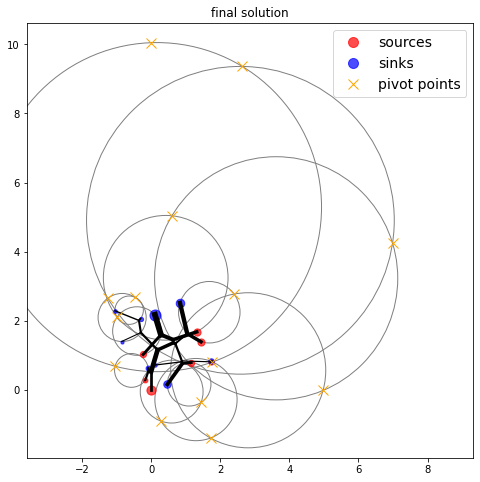

In [5]:
#fov = np.array([[-4,3],[-1,6]])
fov=None
_, geometric_cost = geometric_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                iter_left_child_dict,
                plot=True, title="", fov=fov, save=False, save_name="img")

print("compare geo_cost=", geometric_cost, "tree_cost=", running_cost)

In [9]:
l = list(topo.edges())
np.random.choice(np.arange(len(l)))

10

In [18]:
nx.get_edge_attributes(topo, "weight")

{(0, -1): -100.0,
 (-1, -6): -0.2029799586009915,
 (-1, -2): -99.79702004139901,
 (-6, 1): -30.150308626961078,
 (-6, 8): 30.35328858556207,
 (-2, -5): -32.608765502146895,
 (-2, -3): -67.18825453925211,
 (-5, 7): 2.518800802246716,
 (-5, -13): -30.08996469990018,
 (-3, -8): -11.70820922472376,
 (-3, -4): -55.480045314528354,
 (-13, 13): 10.980832666817719,
 (-13, 14): 19.10913203308246,
 (-8, -12): -79.70143959007049,
 (-8, 2): -67.99323036534673,
 (-4, -11): -22.847417139252542,
 (-4, -7): -32.63262817527581,
 (-12, 5): -50.75143606103819,
 (-12, 12): 130.45287565110868,
 (-11, 11): 90.08650824460899,
 (-11, 4): -67.23909110535645,
 (-7, -14): -4.3102577348600235,
 (-7, -9): -28.32237044041579,
 (-14, 15): 40.01073982795957,
 (-14, 6): -35.700482093099545,
 (-9, -10): -21.817482986251342,
 (-9, 9): 6.5048874541644475,
 (-10, 3): -50.87290341024231,
 (-10, 10): 72.69038639649365}

In [17]:
np.min(topo.nodes())

-14